# 05. Kinematic equations and trajectories of free fall
Software 2<br>
Autumn 2022-2024, Sakari Lukkarinen<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

## Constant velocity and acceleration

Kinematic equation (1D)

$x(t) = x_0 + v_0 t + \frac{1}{2}at^2$

- $x_0$ = initial position ($m$)
- $v_0$ = constant velocity ($m/s$)
- $a$  = constant acceleration ($m/s^2$)

## Example

<img src = "05_1_Example.png" style = "height:300px;">
For more details, see Software 1, Lecture notes for Physics.

## Constant velocity - the motorist

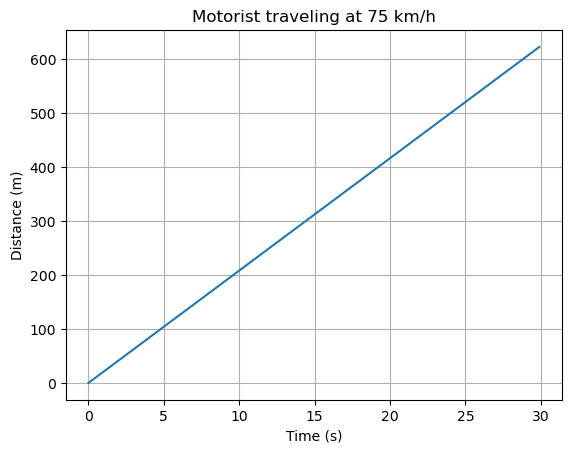

In [2]:
v0_kmh = 75 
v0 = v0_kmh*1000/3600 # km/h => m/s
t = np.arange(0, 30, 0.1)
x = v0*t
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title(f'Motorist traveling at {v0_kmh} km/h')
plt.grid()
plt.show()

## Constant acceleration - the police car

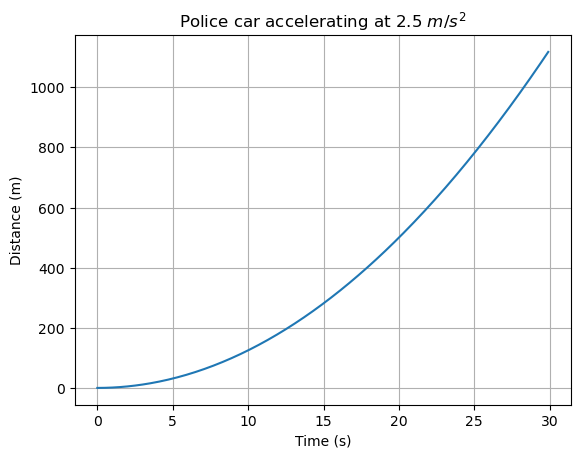

In [3]:
a = 2.5 # m/s^2
x2 = 1/2*a*t**2
plt.plot(t, x2)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title(f'Police car accelerating at {a} $m/s^2$')
plt.grid()
plt.show()

## Comparison

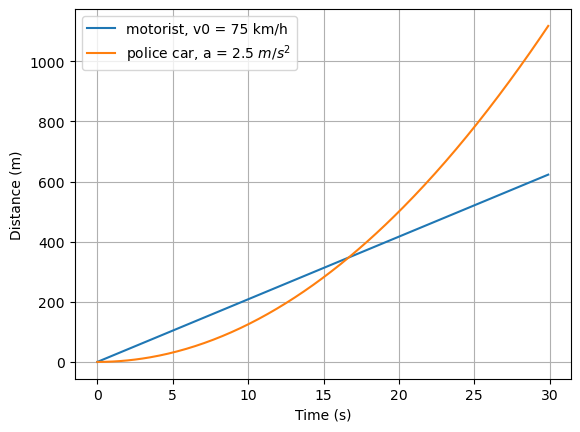

In [4]:
plt.plot(t, x, label = f'motorist, v0 = {v0_kmh} km/h')
plt.plot(t, x2, label = f'police car, a = {a} $m/s^2$')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid()
plt.show()

## When does the officer catch the speeder?

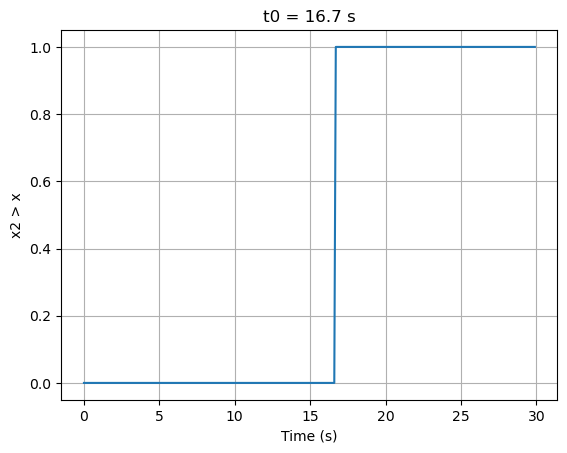

In [5]:
# When is x2 greater than x?
i = (x2 > x) 
plt.plot(t, i)
plt.xlabel('Time (s)')
plt.ylabel('x2 > x')
plt.grid()

# When does that happen?
t0 = np.min(t[i])
plt.title(f't0 = {t0} s')
plt.show()

### Comparison with catching time

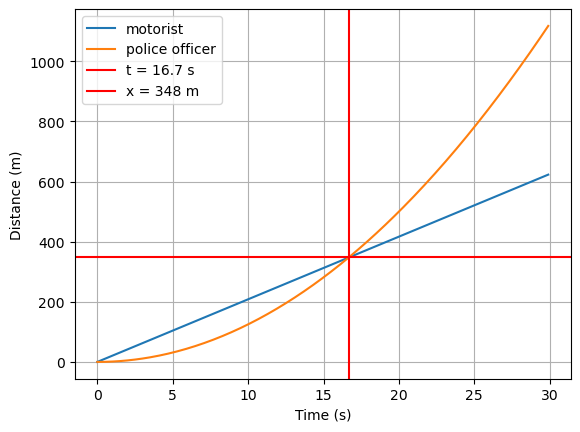

In [6]:
i2 = (t == t0)
x0 = x[i2]
plt.plot(t, x, label = 'motorist')
plt.plot(t, x2, label = 'police officer')
plt.axvline(t0, color = 'red', label = f't = {t0} s')
plt.axhline(x0, color = 'red', label = f'x = {x0[0]:.0f} m')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid()
plt.show()

## Police car's velocity

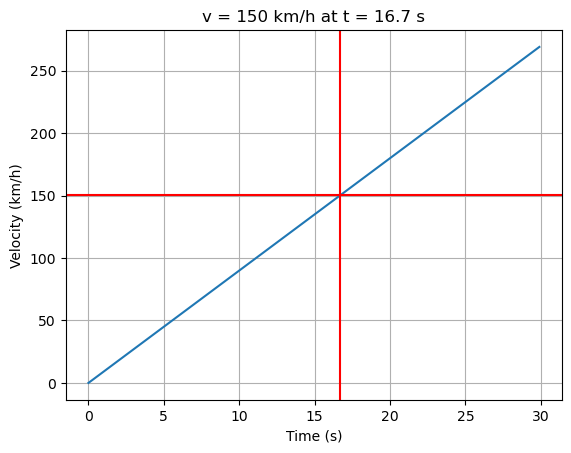

In [7]:
v = a*t *3600/1000 # m/s ==> km/h
i2 = (t == t0)
v2 = v[i2]

plt.plot(t, v)
plt.axvline(t0, color = 'red')
plt.axhline(v2, color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (km/h)')
plt.title(f'v = {v2[0]:.0f} km/h at t = {t0} s')
plt.grid()
plt.show()

## Projectile motion
<img src="05_4_Projectile_motion.png" alt="Projectile motion" width="400" height="300">

<img src="05_2_Projectile_motion.png" alt="Projectile motion" width="150" height="300"><img src="05_3_Projectile_motion.png" alt="Projectile motion" width="150" height="300">

$\begin{array}{lcl} 
v_x & = & v_0 \cos(\theta) \\
v_y & = & v_0 \sin(\theta) - gt\\
x   & = & x_0 + v_0 \cos(\theta) t \\
y   & = & y_0 + v_0 \sin(\theta) t - \frac{1}{2}gt^2
\end{array}$

NOTE: The angle for trigonometric functions (sin, cos, tan) should be given in [radians](https://en.wikipedia.org/wiki/Radian). For that reason we need [np.deg2rad()](https://numpy.org/doc/stable/reference/generated/numpy.deg2rad.html) function to convert the degrees to radians. See also: [Conversions of angles](https://en.wikipedia.org/wiki/Radian#Conversions).

## Example

You toss a ball at speed of 25.0 $m/s$ and It leaves your hand at  1.5 $m$  above a floor in angle of 30 degrees. How far does the ball flight? Draw the trajectory of the ball.

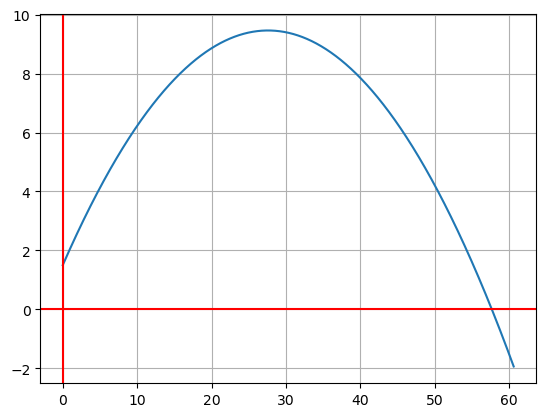

In [8]:
x0, y0 = 0, 1.5
v0 = 25.0
theta = np.deg2rad(30)
g = 9.81

t = np.arange(0, 2.8, 0.001)

vx = v0*np.cos(theta)
vy = v0*np.sin(theta) - g*t
x = x0 + v0*np.cos(theta)*t
y = y0 + v0*np.sin(theta)*t - 1/2*g*t**2

plt.plot(x, y)
plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.grid()

### When does the ball land to the floor?

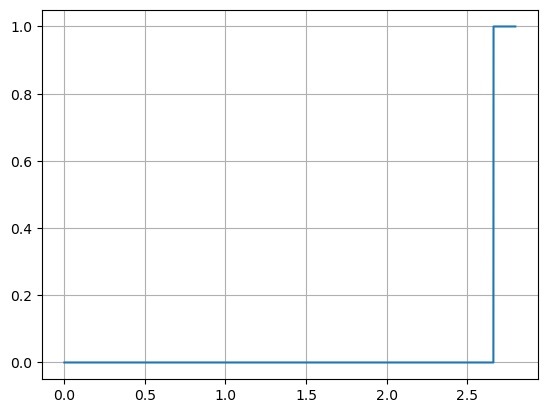

In [9]:
i = (y <= 0)
plt.plot(t, i)
plt.grid()

In [10]:
t_end = np.min(t[i])
print(f't_end = {t_end} s')

t_end = 2.664 s


### What is the landing location?

In [11]:
i_end = (t == t_end)
x_end = x[i_end][0]
print(f'The ball lands at x = {x_end:.1f} m')

The ball lands at x = 57.7 m


-----

## Creating animation (BONUS)

[FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) makes an animation by repeatedly calling a given graphics function. The animation is then converted to HTML presentation by using [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) module's HTML class.

We use the same data as in previous example, but now we reduce the time step in order to make the simulation run smoother.

C:\Users\tommiluk\AppData\Local\Temp\ipykernel_16188\3371024617.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  l2.set_data(x[i], y[i])


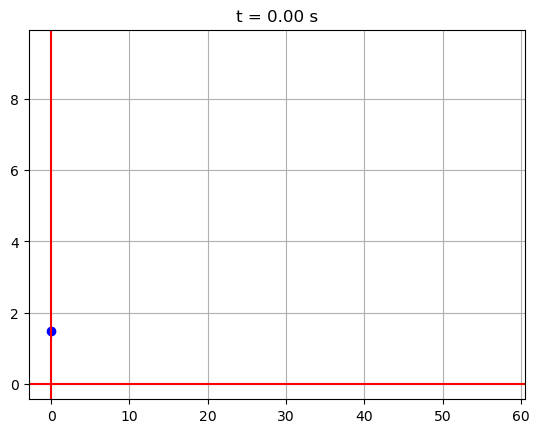

In [12]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

t = np.arange(0, 2.67, 0.02)

vx = v0*np.cos(theta)
vy = v0*np.sin(theta) - g*t
x = x0 + v0*np.cos(theta)*t
y = y0 + v0*np.sin(theta)*t - 1/2*g*t**2

# Initialize the graph
fig, ax = plt.subplots()
l, = ax.plot(x, y)
l2, = ax.plot(x[-1], y[-1], 'bo')

plt.axhline(0, color = 'red')
plt.axvline(0, color = 'red')
plt.grid(True)

# Animation function
def animate(i):
    l.set_data(x[:i], y[:i])
    l2.set_data(x[i], y[i])
    ax.set_title(f't = {t[i]:.2f} s')

# Create animation
ani = FuncAnimation(fig, animate, frames=len(x))

# Show the animation
HTML(ani.to_jshtml())